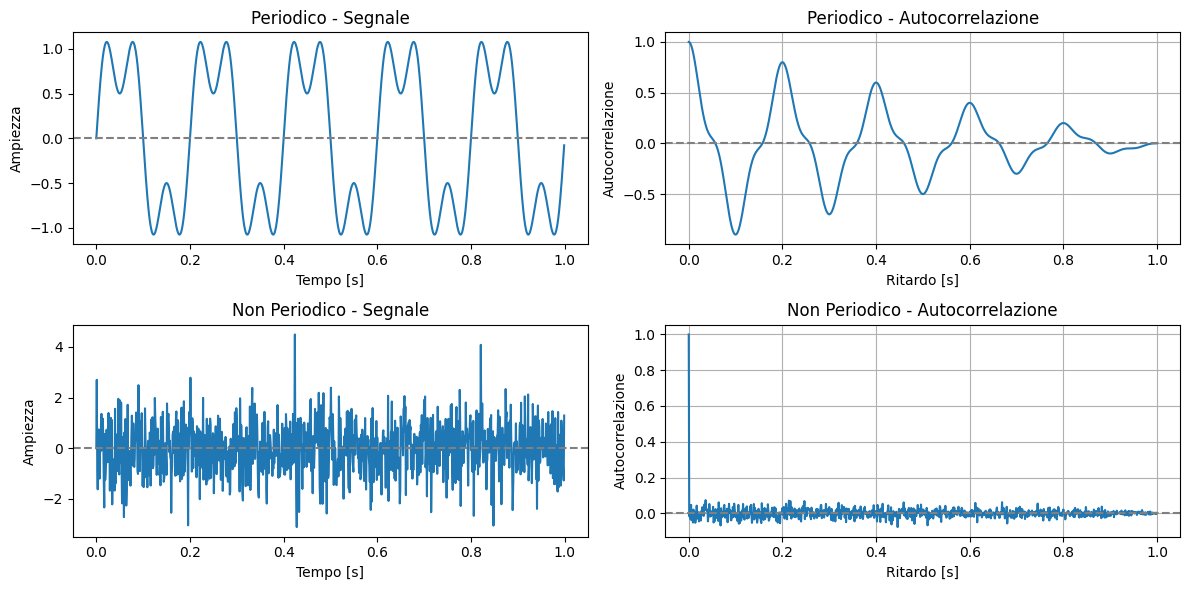

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri comuni
fs = 1000  # Hz
N = 1000   # numero di campioni
t = np.linspace(0, N/fs, N, endpoint=False)

# Segnale periodico: somma di due sinusoidi
signal_periodic = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 15 * t)

# Segnale non periodico: rumore bianco
signal_random = np.random.randn(N)

def plot_autocorrelation(signal, fs, title, subplot_idx):
    autocorr = np.correlate(signal, signal, mode='full')
    autocorr = autocorr / np.max(autocorr)  # normalizza
    lags = np.arange(-len(signal) + 1, len(signal)) / fs
    lags_pos = lags[lags >= 0]
    autocorr_pos = autocorr[len(signal)-1:]

    plt.subplot(2, 2, subplot_idx)
    plt.plot(t, signal)
    plt.axhline(0, color='gray', linestyle='--')
    plt.title(f'{title} - Segnale')
    plt.xlabel('Tempo [s]')
    plt.ylabel('Ampiezza')

    plt.subplot(2, 2, subplot_idx + 1)
    plt.plot(lags_pos, autocorr_pos)
    plt.axhline(0, color='gray', linestyle='--')
    plt.title(f'{title} - Autocorrelazione')
    plt.xlabel('Ritardo [s]')
    plt.ylabel('Autocorrelazione')
    plt.grid(True)

plt.figure(figsize=(12, 6))
plot_autocorrelation(signal_periodic, fs, 'Periodico', 1)
plot_autocorrelation(signal_random, fs, 'Non Periodico', 3)
plt.tight_layout()
plt.show()